<a href="https://colab.research.google.com/github/RPG-coder/atari-transfer-learning/blob/master/CS677_FinalProject_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS677 Deep Learning | Final Project

## Proposal -  Improved Bot Learning process on Atari games by using Transfer Learning

## Team: 
- Ching-Hao Sun
- Chia-Lin Hsieh
- Rahul Gautham Putcha

## Index
- [Abstract](#Abstract)
- [Setting up Google Drive for Colab (Recommended for Training)](#Setting-up-Google-Drive-for-Colab-(Recommended-for-Training))
- [Baseline Models](#Baseline-Models:)
- [Candidate ML Models / Methods](#Candidate-ML-Models-/-Methods)
- [Project Environment Setup](#Project-Environment-Setup)
  - [Part 1: Installation of GYM](#Part-1)
  - [Part 2: Reinforcement Learning Dependencies](#Part-2)
- [Working on the Project: PART I - Learning the first game](#Working-on-the-Project:-PART-I---Learning-the-first-game)
  - [Hyperparameters](#Hyperparameters)
  - [About Reinforcement Learning](#About-Reinforcement-Learning) : (Yet-to-update)
  - [Replay Memory](#Replay-Memory)
  - [Agent](#Agent)
  - [Starting the Game Environment](#Starting-the-Game-Environment)
  - [A short demo: Of how the model predicts](#A-short-demo:-Of-how-the-model-predicts)
  - [Q-Learning](#Q-Learning)
  - [Model Checkpointing](#Model-Checkpointing)
- [Transfer Learning: PART II - Learning the second game](#Transfer-Learning:-PART-II)


## Abstract
Reinforcement learning algorithms require tens of thousands or millions of time steps -
which is equivalent to several weeks of training in real time to learn how to play a
single game. Having a bot trained from scratch is costly in terms of time and processing
power.

Suppose we have a pre-trained model of a bot that has already learnt to play one game. 
We intend to make use of the same trained-model for a bot in learning another game of 
a similar traits/environment, thereby improving the efficiency of learning the second 
game and expanding the bot’s knowledge in tackling multiple games in less time.

## Baseline Models:
CNN (Convolutional Neural Network) with DQN (Deep-Q-Network; a Q-Learning variant)


## Candidate ML Models / Methods
- Deep Convolutional Neural Network
- Deep Q-Network
- Transfer Learning


## Setting up Google Drive for Colab (Recommended for Training)
Before carring out this section please visit the Git Repo for this repository and find IPYNB **[FIRST-PRIORITY-RUN]: Project Setup File** before this file.

- [GitHub project repo](https://github.com/RPG-coder/atari-transfer-learning)

Feel free to skip this process if you are doing locally on a GPU

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd "drive/MyDrive/CS677DeepLearning/atari-transfer-learning"

/content/drive/MyDrive/CS677DeepLearning/atari-transfer-learning


## Project Environment Setup

### Part 1
#### Requirements:
  - Development Environment Window (Installation procedure is similar for Linux and Mac too...)
  - Miniconda or Anaconda with conda cmd installed 


#### Install Microsoft Visual Studio 2022 (For Windows only)
  - Select Build Tools Desktop Development with C++

#### Installation process
- Open a Terminal (For example: Command prompt) ... Require Conda cmd installed by using Miniconda installation setup
- Setup a new environment **(Recommended)**\
    <code>$ conda create -n env3</code>
    
    <code>$ conda activate env3</code>

- Install Necessary Package in our new environments

  - Install Python3.7 \
    <code>$ conda install python=3.7</code>
    
  - Install OpenAI Gym for Atari games \
    <code>$ pip install gym[atari]</code>

- With this project comes a git repository where you can download the project folder structure and the necessary file after environment setup shown above.
   - The link to [GitHub project repo](https://github.com/RPG-coder/atari-transfer-learning)


- After Setting up the repo locally into your computer, put all of your atari game into the './roms' folder.
- Choose a Atari game from any of the following sources or your choice:
  - [Breakout from oldgames.sk](https://www.oldgames.sk/en/game/breakout/download/8314/)
  - [SpaceInvaders from consoleroms.com](https://www.consoleroms.com/roms/atari-2600/space-invaders)
  - [SpaceInvaders from atarimania.com](http://www.atarimania.com/game-atari-2600-vcs-space-invaders_s6947.html)

- Also, you can see by default the roms folder contains Breakout and SpaceInvaders '.bin' files in it.
- After putting all of your games that you want to run in this project, go back to the terminal where you are running conda environment.
- Run following cmd to load the game into the arcade learning environment (A way for us to use the atari games using open-ai gym) \
    <code>$ ale-import-roms /roms</code>

**You are now all set to Run this project...**

FacedError: If not all's set, no need to worry. Execute below project steps sequentially to get all dependencies setup in no time.

### Making Gym[Atari] work on our localhost
At first we load the games by importing the Arcade Learning Environment package. we uploaded the games using ale-import-roms into this program and use it inside gym emulator. 

This is a setup tutorial, if you have already done with the setup feel free to skip and proceed to [Part 2](#Part-2) or [Working on the Project](#Working-on-the-Project:-PART-I---Learning-the-first-game)

This project requires Python 3.7 and gym[atari]==0.19.0

**Execute below line (START to END) if you are on Google Colab**\



**else execute below line in conda CLI environment such as env3 as mentioned above. GOOGLE COLAB may not require bellow steps as it is already pre-configured with packages.**

For Example,\
Conda Terminal or CMD prompt(Windows) or Terminal(Linux or Mac OS)\
<code>(env3) path> conda uninstall python</code>\
<code>(env3) path> conda install python=3.7</code>

**START**

In [16]:
!pip uninstall gym
!pip install gym[atari]==0.21.0

Found existing installation: gym 0.17.3
Uninstalling gym-0.17.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/gym-0.17.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/gym/*
Proceed (y/n)? n
     |████████████████████████████████| 1.5 MB 14.3 MB/s 
     |████████████████████████████████| 1.6 MB 74.9 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616823 sha256=a4787fc87099c0bc6a620eaebbbbd4747fa672111e12e3931bd1623860d14ac3
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3


In [17]:
!pip install ale_py
!pip install pyglet

**END**

**(Mandatary execution)** Executing below step will import games that are necessary for our project

In [3]:
import ale_py

In [4]:
!ale-import-roms roms

[SUPPORTED]                 breakout              roms/Breakout.bin
[SUPPORTED]           space_invaders         roms/SpaceInvaders.bin



Imported 2 / 2 ROMs


In [5]:
import warnings
from ale_py import ALEInterface
from ale_py.roms import Breakout
from ale_py.roms import SpaceInvaders

ale = ALEInterface()        # Ignore any Deprecation warnings cause by this line
ale.loadROM(Breakout)       # This line will load your Breakout game into this project
ale.loadROM(SpaceInvaders)  # This line will load your SpaceInvaders game into this project

/usr/local/lib/python3.7/dist-packages/ale_py/roms/utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


Let Try to see the Breakout atari game inside of gym,

In [6]:
import gym
env = gym.make('BreakoutDeterministic-v4')#('SpaceInvaders-v4')

Actions moves the bot can make in this game:

In [7]:
print(f"This game supports {env.action_space.n} action moves")
print(f"The moves are {env.unwrapped.get_action_meanings()}") # Note that the NOOP means no operation or no move

This game supports 4 action moves
The moves are ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


A basic game play can be executed as follows:

In [8]:
env.reset() # Start the game from beginning
t=0 # timestamp (epoch)
while True: # Run the game till the game is over, for every timestep
    #env.render() # COMMENT THIS LINE ON COLAB // Print the game to the screen ...
    action = env.action_space.sample() # Random action
    observation, reward, done, info = env.step(action) # At each step try random action
    if done: # if the game is over (End of the game: can be win, lose or draw in any game) => Stop the game
        print("Episode is finished after the {} timesteps".format(t+1))
        print("Episode info: {}".format(info)) # What the reason? for the game to stop
        break
    t=t+1

env.close() # Close the window
print() # Just for format: This one just prints nothing so we can avoid the print of previous line in jupyter

Episode is finished after the 255 timesteps
Episode info: {'lives': 0}



You will see the game window pop up and close automatically. 

If you did Hurray!! We are now able to work with any game using Gym in our project.

### Part 2

Install Reinforcement Learning process dependencies

**Execute below line (START to END) in conda CLI environment such as env3 as mentioned above. GOOGLE COLAB may already have following packages pre-installed**

**START**

**END**

## Working on the Project: PART I - Learning the first game
If you run above commands we will see below import modules to be successfully executed in our program

In [9]:
# Basic Python Libraries
import os
import sys
import itertools
import random
from collections import deque

# Gym for loading Atari Environment compatible for Reinforcement Learning
import gym
from gym.wrappers import Monitor

# Basic Data Science Libraries (Useful for Reinforcement Learning)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import keras

# Image Processing Libraries
import cv2
import imageio
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import img_as_ubyte

In [10]:
# For Deep Learning: Building Neural Network
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Multiply, Concatenate, LeakyReLU, Lambda, Conv2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

### Hyperparameters
Below are the hyperparameters that we are using to tune the learning process of the agent.

In [27]:
# Hyperparameters space
HYPERPARAMS = {
    # Google COLAB Setting
    "ON_COLAB": False,
    "COLAB_COMPATIBLE_MODEL": False,  # We have seen that Colab's GYM env considers all 18 actions of Atari game machine
                                      # This is alleveated by installing newer gym=0.21.0 and pyglet, !pip install pyglet
                                      # This parameter say our model to consider 18 actions by default.
                                      # In our project we mistakenly trained old project model on 18 action which made the training time high due to larger actions
                                      # In case we are required to make use of backward compatible model we set this to TRUE
    
    # Reinforcement Learning Parameters
    "ENV_NAME"        : 'BreakoutDeterministic-v4', # Name of environment to be used
    # ('SpaceInvaders-v0') # ('Assault-ram-v0')
    "MEM_SIZE"        : 18000, # Size of replay memory
    "GAMMA"           : 0.99,   # Gamma (Discount rate) of Markov decision process
    
    # Exploration vs Exploitation (for Epsilon Decay Policy)
    "EPSILON"         : 0.5,     # Start agent at exploration stage=1, or exploitation=0
    "EPSILON_MIN"     : 0.01,
    "EPSILON_DECAY"   : 0.5,
    "TOTAL_FRAMES"    : 5000000,
    "EPSILON_MAX"     : 1,
    
    # Model Training Hyper Parameters
    "LEARNING_RATE"   : 0.00000001,
    "MOMENTUM"        : 0.001,
    "STACK_SIZE"      : 4,
    "HIDDEN_NEURONS"  : 1024,  # Number of Neurons in the Deep Neural Network
    "MINIBATCH_SIZE"  : 96,
    "NUM_EPISODES"    : 50, # Number of episodes/gameplay for the agent training
    "RETRAIN"         : 32,  # Number of times the agent background model trains on its Replay memory before proceeding
    
    # Model used in Replay Memory for Exploitation (Learning to win) on What has be Explored (or What has been found).
    "TGT_UPDATE_FREQ" : 1500,
    "NUM_EXPLORE"     : 1000,
    
    # For demo purpose
    "VIS_DIR"               : "GIFs", # For GOOGLE COLAB Environment only
    "AUTOSAVE_CHECKPOINT"   : 500,   # Auto save model after a number of episode = 100
    "SAVED_MODEL_NAME"      : "model_dqn_breakout.h5", # Name of final model, second game "model_dqn_spaceshoot.h5"
    "TRANSFER_MODEL_NAME"   : "model_dqn_breakout.h5",
    
    # Extra Tuning
    "NOOPMAX"         : 8, # Maximum number of No operation actions taken at the beginning of the game (For using every exploration)
    
    # Testing
    "NUM_EVAL"        : 20, # Number of Evals (Test runs)
    
    "LIVES"           : "lives"
}

In [12]:
#Lists to store loss and reward value per game!
LOSS_HISTORY = []
REWARD_HISTORY = []

# Number of Frame viewed OR number of times env.step(action) called.
FRAME_COUNT = 0

model_swap =1
if not os.path.exists("models"): 
    os.mkdir("models")

### About Reinforcement Learning


### Replay Memory
Replay Memory for improving the agent model by making it play (or fitting) over it past experience, stored in it's Memory.

In [13]:
# For Boosting Experience
class Replay_Memory:
    '''
        This replay memory clas would act as a buffer in which previous experiences would be stored. 
        Agent Experience = [ state=current_state, action=current_action, reward, next_state, done]
    '''
    def __init__(self, MEM_SIZE = 2000): 
        self.wrong_move_memory = deque(maxlen = MEM_SIZE//3)  # Bad Moves
        self.decent_move_memory = deque(maxlen = MEM_SIZE//3) # No Change
        self.right_move_memory = deque(maxlen = MEM_SIZE//3)  # Good Moves
        self.max_size = MEM_SIZE
    def add(self,  state, action, reward, next_state, done):
        if reward < 0 or done:
          self.wrong_move_memory.append(( state, action, reward, next_state, done))
        elif reward > 0:
          self.right_move_memory.append(( state, action, reward, next_state,done))
        else:
          self.decent_move_memory.append(( state, action, reward, next_state,done))

### Agent
The agent class: contains the following attribute,
- Performs Learning using Reinforcement Learning
- Saves/Loads the model
- Contains Background model and Foreground model
- Foreground model plays the game (Exploration)
- Background model trains on its Explored Observation (or states/images/frames)
- Background model is trained by means of using Replay Memory as mentioned above.
- Foreground model is updated after every TGT_UPDATE_FREQ periods on swap count i.e.,(swap_count % TGT_UPDATE_FREQ == 0)
- **Special:** Can also do Transfer Learning
- Transfer Learning is a ability of making an agent that has learned to play one game to play another game of similar but higher complexity, in a short duration.

In [14]:
# Model/Agent
class Agent:
    '''This class contains all methods for an agent to function.'''
    
    def __init__(self, env, action_size=None, model_pathname=""):
        print("Setting up the agent ...")
        self.reset_parameters(env, action_size)
        self.model = self.build_model(model_pathname) if model_pathname else self.build_model()
        self.target_model = self.get_tgt_model()
        
        print("Agent has been Sucessfully setup ...")
        
    def reset_parameters(self, env, action_size=None):
        self.state_size = env.observation_space.shape[0]
        self.action_size = 18 if HYPERPARAMS["COLAB_COMPATIBLE_MODEL"] else env.action_space.n
        if action_size: self.action_size = action_size
        self.memory = Replay_Memory(HYPERPARAMS["MEM_SIZE"])
        self.gamma = HYPERPARAMS["GAMMA"]
        self.epsilon = HYPERPARAMS["EPSILON"]
        self.epsilon_max = HYPERPARAMS["EPSILON_MAX"]
        self.epsilon_min = HYPERPARAMS["EPSILON_MIN"]
        self.total_frame = HYPERPARAMS["TOTAL_FRAMES"]
        self.slope = (self.epsilon_max - self.epsilon_min)/self.total_frame
        self.epsilon_decay = HYPERPARAMS["EPSILON_DECAY"]
        self.lr = HYPERPARAMS["LEARNING_RATE"]
        self.momentum = HYPERPARAMS["MOMENTUM"]
        self.dummy_input = np.zeros((1,self.action_size))
        self.dummy_batch = np.zeros((HYPERPARAMS["MINIBATCH_SIZE"],self.action_size))
        
    # Function for Agent Model Setup
    def lambda_out_shape(self, input_shape):
        shape = list(input_shape)
        shape[-1] = 1
        return tuple(shape)
        
    
    def build_model(self, model_pathname=""):
        '''Model to train the agent'''
        return self._build_compatible_model(self.action_size, model_pathname=model_pathname)

    def transfer_learning(self, new_env, prev_model_pathname, old_actions_size, new_actions_size):
        '''
            Perform a transfer of knowledege about a game of similar less complex enviroment to this game.
            Please supply:
            - model_pathname: the location of model file that has already learnt to training on a game.
            - old_action_size: the estimation of size for the already learnt game.
            - new_action_size: the estimation of size for the current game being played.
            Returns model
        '''
        self.model = self._build_compatible_model(old_actions_size, True, new_actions_size,prev_model_pathname)
        self.target_model = self._build_compatible_model(old_actions_size, True, new_actions_size,prev_model_pathname)
        self.reset_parameters(new_env)
        return

    def _build_compatible_model(self, actions_size, is_transfer_learning=False, new_actions_size=0, model_pathname=""):
        '''A single method to build model normally or build model after transfer learning from another game'''
        prev_actions_size = actions_size
        agent_bot = self
        
        input_layer = Input(shape=(84, 84, HYPERPARAMS["STACK_SIZE"]), name="image")     # Sending the stack of 4 resized image of 84*84

        # Convolution-Max Pooling parts
        conv_layer1 = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', use_bias=False, name="conv2D_1", kernel_initializer=tf.keras.initializers.VarianceScaling(scale=2))(input_layer)
        # May Introduce Max Pooling here ...
        conv_layer2 = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', use_bias=False, name="conv2D_2", kernel_initializer=tf.keras.initializers.VarianceScaling(scale=2))(conv_layer1)
        # May Introduce Max Pooling here ...
        conv_layer3 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', use_bias=False, name="conv2D_3", kernel_initializer=tf.keras.initializers.VarianceScaling(scale=2))(conv_layer2)
        # May Introduce Max Pooling here ...
        conv_layer4 = Conv2D(HYPERPARAMS["HIDDEN_NEURONS"], (7, 7), strides=(1, 1), activation='relu', use_bias=False, name="conv2D_4", kernel_initializer=tf.keras.initializers.VarianceScaling(scale=2))(conv_layer3)

        # Densely connected Neural Network
        flat_feature = Flatten(name="flat_1")(conv_layer4)
        q_value_prediction = Dense(prev_actions_size, name="q_values", activation='relu')(flat_feature) # Setting up the Output Layer
        model = Model(inputs=[input_layer], outputs=[q_value_prediction])
        
        # LOAD AUTO_SAVE CHECKPOINT: If filename is provided and not for Transfer learning
        if len(model_pathname)>0 and is_transfer_learning==False:
            model.load_weights(model_pathname)

        # PREFORM TRANSFER LEARNING FROM OLD MODEL: If filename is provided and not for Transfer learning
        if is_transfer_learning and len(model_pathname)>0:
            # Load model for previous game
            model.load_weights(model_pathname)
            
            # Sibling layers for learning actions
            prev_Qlayer = model.get_layer(name="q_values")
            prev_Qlayer._name = "old_action_q_values"
            new_Qlayer = Dense(new_actions_size, name="new_action_q_values", activation='relu')

            # Merge the Sibling layers to form one layer to estimate Q-values
            q_value_prediction = Concatenate(name="q_values")([prev_Qlayer(flat_feature), new_Qlayer(flat_feature)])
            model = Model(inputs=[input_layer], outputs=[q_value_prediction])
        
        model.compile(loss=['mse','mse'], loss_weights=[0.0,1.0],optimizer=Adam(agent_bot.lr))
        return model
        
    def get_tgt_model(self):
        '''This method would clone the architecture as well as the initial weights of the base model into target model'''
        self.target_model = self.build_model()
        self.update_target_model()
        return self.target_model
    
    def update_target_model(self): 
        '''This method would update weights of target model'''
        self.target_model.set_weights(self.model.get_weights())
    
    def load_model(self, pathname): 
        '''This method would load weights of model'''
        # load weights into new model
        self.model.load_weights(pathname)
        self.target_model = self.get_tgt_model()
        print("Loaded model from disk")
        
    def save_model(self, pathname):
        '''Save method would save weights of model model'''
        # serialize weights to HDF5
        self.model.save_weights(pathname)
        self.target_model = self.get_tgt_model()
        print("Saved model to disk")
        

    # Agent Play Prediction function
    def next_action(self, state):
        '''Get the next action using epsilon greedy policy for deciding whether to exploit or explore'''
        
        if self.epsilon > self.epsilon_min: # Epsilon 
            self.epsilon = self.epsilon_max - self.slope*(FRAME_COUNT)
            
            
        if (np.random.rand() <= self.epsilon):
            return env.action_space.sample()
        #print(self.dummy_input.shape)
        q_values = self.model.predict([np.expand_dims(state,axis=0)])[0]
        return np.argmax(q_values[0])

    # Replay Functions
    def store_experience(self, state, action, reward, next_state, done):
        '''Store the experience in our replay memory'''
        self.memory.add(state, action, reward, next_state, done)

    def replay(self, batch_size, model_swap):
        '''
            Does the back propogation to adjust weights during exploitation action.
            - batch_size: total number of random samples that the agent can recollect from memory
            - The higher the batch_size more is the time for training process.
        '''
        # REINFORCEMENT LEARNING
        print("Game Play Paused! Model is training on it's past Memory")
        # First we set all input to NOOP or no move for every observations(stack of frames or images)
        # Dummy_Inputs_batch.shape = [(MINBATCH_SIZE = 32 images), (action_size = 4 moves for breakout)]
        #dummy_batch = np.zeros((batch_size,18 if HYPERPARAMS["COLAB_COMPATIBLE_MODEL"] else self.action_size)) 
            
        #for i in np.arange(HYPERPARAMS["RETRAIN"]):    
        # Experience batch set
        state_batch      = []
        action_batch     = []
        reward_batch     = []
        next_state_batch = []
        terminal_batch   = []  # recording Is_done?
        
        # Actual Move that should have played (This is also an Assumption)
        y_batch = []

        # Sample random minibatch of transition from replay memory
        minibatch = random.sample(list(self.memory.wrong_move_memory), batch_size//3) + random.sample(list(self.memory.right_move_memory), batch_size//3) + random.sample(list(self.memory.decent_move_memory), batch_size//3)
        #print(minibatch[0])
        # For every experience thats in our Replay Memory
        for data in minibatch: # We organize the data
            state_batch.append(data[0])
            action_batch.append(data[1])
            reward_batch.append(data[2])
            next_state_batch.append(data[3])
            terminal_batch.append(data[4]) # is_done!!
        
        # Convert the is_done to a numpy array
        terminal_batch = np.array(terminal_batch, dtype="int8")

         
        
        # Get what agent is assuming with the trained model till now. Supplying NOOP/NoAction input for every move... 
        # Model is predicting the Q-Value or we can all it as Future reward from current move (or action) made
        target_q_values_batch = self.target_model.predict([np.float32(np.array(next_state_batch))])[0]
        # What model should assume (The Assumption is to predict its own output without any gameover) Outrageous!!
        y_batch = reward_batch + (1 - terminal_batch) * self.gamma * np.max(target_q_values_batch, axis=-1)
        # (1 - terminal_batch) above is to indicate the game is_done(0, return only reward for bad move) or in_progress(1, return reward with discounted sum)
        # y_batch is also called Future Reward or the reward model is expecting to get in the future.

        # START TRAINING PROCESS
        # Get the loss between current state Q value & the future state that Q-values
        loss = self.model.train_on_batch([np.float32(np.array(state_batch))], [y_batch])

        LOSS_HISTORY.append(loss)
    
        # END TRAINING PROCESS
        
            #At target network's update frequency, update the target network
        if(model_swap % HYPERPARAMS["TGT_UPDATE_FREQ"] == 0):
            self.update_target_model()  # Swap Model
            print("Target model swapped successfully with Trained model!")   
            
        return 

In [15]:
# Helper functions

def preprocess(image):
    '''This method downsamples and resizes the images to 84*84 and converts it to grayscale for CNN compatibility and processing efficiency'''
    # Downsample(image) & resize image into square for CNN compatibility
    #resized_image = preprocess_rgb(image)
    #grayscale_image = rgb2gray(resized_image)
    
    # crop image (top and bottom, top from 34, bottom remove last 16)
    img = image[34:-16, :, :]
    # resize image
    img = cv2.resize(img, (84, 84))
    img = img.mean(-1,keepdims=True)
    img = img.astype('float32') / 255.
    return img #grayscale_image

def preprocess_rgb(image):
    '''This method downsamples and resizes the images to 84*84 and converts it to grayscale for CNN compatibility and processing efficiency'''
    # Downsample(image) & resize image into square for CNN compatibility
    resized_image = cv2.resize(image[::2, ::2], (84, 84), interpolation = cv2.INTER_AREA)
    return resized_image

def generate_gif(frame_no, frames, reward, path, e):
    '''Utility method to generate gif from frames'''
    for idx, frame_idx in enumerate(frames): 
        frames[idx] = resize(frame_idx, (420, 320, 3), preserve_range=True, order=0).astype(np.uint8)
        
    imageio.mimsave(f'{path}{"episode_{0}_frame_{1}_reward_{2}.gif".format(e, frame_no, reward)}', frames, duration=1/100)


### Starting the Game Environment
As seen previously we have installed the environment for running any game within gym emulator setup. Now is the time to get things working in action, for the main aim of this project.

In [21]:
from ale_py import ALEInterface
from ale_py.roms import Breakout, SpaceInvaders,Tetris
ale = ALEInterface()
ale.loadROM(Breakout) #ale.loadROM(Breakout)

In [22]:
import gym
env = gym.make(HYPERPARAMS["ENV_NAME"])

In [23]:
print(f'ENVIRONMENT {HYPERPARAMS["ENV_NAME"]}:')
print(f'This environment requires {env.action_space.n} actions.')
print(f'The actions are {env.unwrapped.get_action_meanings()}.')

ENVIRONMENT BreakoutDeterministic-v4:
This environment requires 4 actions.
The actions are ['NOOP', 'FIRE', 'RIGHT', 'LEFT'].


In [24]:
agent = Agent(env)

Setting up the agent ...
Agent has been Sucessfully setup ...


### A short demo: Of how the model predicts

For the first step we are delivering the **STACK_SIZE=4** number of images at a time in our agent model. Along with this is the current action being played. The action signifies the last move that was played, i.e. the move played by in the last image of the 4 image stack/sequence.

You may wonder why we are considering the **STACK_SIZE**. Firstly, DeepMind choose to use the past 4 frames. Why?
1. frame doesnot describe the movement of player or the enemies or any items. (Relative motion of any object)
2. frames bare minimum requirement to learn about the speed of objects. (We capture the relative position on object between 2 frames)
3. frames is necessary to infer acceleration. Why? 
   - Every frame we are received with, provides the derivative of position w.r.t time.
4. and so on...

4 windows pop up showcasing how the images look like. 

**Warning: Hit Space or any button to Resume. Else, your IPython Kernel may die/crash.**

By executing below you are letting make it's first prediction. As said before the model takes STACK_SIZE=4 images and the current action (in one hot encoded format).

### Q-Learning
The first four floats, shown above, are the Q-values for each action move that can be played in the game. Also, the Q-values are for the action for the current state. The maximum of these Q-values is the **target output** or y, which we use in our **REPLAY MEMORY OF AGENT** as the expected output.

Process of Reinforcement Learning using Q-Learning
- Get Q-values from Neural Network
- use Target_Qvalue_action_i = r+max(Q-values), or 
  - Future Reward for the action_i on state_s is ( current_reward + max(next_predicted_future_reward) )

### Model Checkpointing
During the training process we found that it is really inefficient to produce the complete training model of 30hrs in a single run. It's better to work checkpoint of 5-10 hrs and save the progress in middle. For this we have devised the load_model and save_model functionality within our agent class.

Use below function to check the trained model performance after training.

**Convert below line to Code block by pressing 'Y', if you already have a saved model. Make sure that the model file exist.**

**OR** run Training blocks to run initial exploration stage, for our agent to get an understanding of the game, and then the Training. Exploration is not exactly understanding, but is a way for us to fill the replay memory with images of the game being played with random actions.

### Game Play

In [25]:
EXPLORE = 1
TRAIN   = 2
TEST    = 3

def slow_start(env,image_stack=[], rgb_stack=[],NOOPMAX=10):
    idle_times = random.randint(4, NOOPMAX)
    
    #print(f'Agent is Staying Idle for {idle_times} times. Agent is thinking about what move to make...')
    for idle_time in range(idle_times):
        #if HYPERPARAMS["ON_COLAB"]==False: env.render() # NOTE: Comment this in Google Colab
        state, reward, done, info = env.step(0) # Zero means: NOOP or No Operation
        processed_frame = preprocess(state)
        image_stack.append(processed_frame)
        rgb_stack.append(preprocess_rgb(state))
        
    return image_stack, rgb_stack

#agent.epsilon = 0.5  # Agent is Exploring the game by default
def gameplay(PLAY_TYPE=TEST,MAX_EPISODE_PLAYTIME=1000000):
    global FRAME_COUNT
    #print(f'Agent is starting a new game: {e} games played.')
    # Reset Game    
    state = env.reset()
    times_rewarded = times_penalized = 0
    last_lives = 5
    terminal_life_lost = False # False if last_lives==0 else True
    
    #print('Agent has made the start move.')
    # Start the game by 'FIRE' action, incase if it doesnot start the game without it
    state, _, _, _ = env.step(1) 
    
    # Fill agent's memory with random times of no operation played
    image_stack,rgb_stack = slow_start(env=env, NOOPMAX=HYPERPARAMS["NOOPMAX"])
    
    
    #print(f'Agent is now playing the game...')
    i, state = 0, np.stack(image_stack[-4:], axis = 2)
    while i < MAX_EPISODE_PLAYTIME:
        
        # If agent has lost a life then start the game with 'FIRE' again.
        if(terminal_life_lost == True):
            state, _, _, _ = env.step(1) # 'FIRE' to start the game
            slow_start(env, image_stack, rgb_stack, HYPERPARAMS["NOOPMAX"])
            state = np.stack(image_stack[-4:], axis = 2)
            terminal_life_lost = False

        FRAME_COUNT = FRAME_COUNT + 1
        action = env.action_space.sample() if PLAY_TYPE==EXPLORE else (agent.next_action(state) if PLAY_TYPE==TRAIN else np.argmax(agent.model.predict([np.expand_dims(state,axis=0)])[0]))

        #if HYPERPARAMS["ON_COLAB"]==False: env.render() # NOTE: Comment this in Google Colab
        # Agent Makes random moves here...
        action = action if action < env.action_space.n else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        last_lives = info[HYPERPARAMS["LIVES"]]
        #rgb_stack.append(preprocess_rgb(next_state))
      

        # Agent updates it's game status here...
        terminal_life_lost = True if info[HYPERPARAMS["LIVES"]] < last_lives else False
        #print(reward, terminal_life_lost, done, info)  
            
        if reward > 0:      
            times_rewarded = times_rewarded + 1
            reward = 100
        elif reward < 0 or done: 
            times_penalized = times_penalized + 1
            reward = -10
        #elif terminal_life_lost: times_penalized = times_penalized + 1
        # Making the starting experience of rewards more fruitful. For our replay memory...
        #reward = 10 if reward > 0 else (-30 if reward < 0 else reward)
        #reward = -30 if terminal_life_lost else reward
        
        # Store the stack of images for new a experience
        processed_frame = preprocess(next_state)
        image_stack = image_stack[-3:]
        image_stack.append(processed_frame)
        
        next_state = np.stack(image_stack, axis = 2)
        if(len(image_stack) != 4): print("Something's not right!! The stack size is less than expected.")
            
        #Store experience in replay mem
        if(PLAY_TYPE==EXPLORE or PLAY_TYPE==TRAIN): 
            agent.store_experience(state, action, reward, next_state, terminal_life_lost)
        state = next_state
        
        if done: break
        i+=1
        
    REWARD_HISTORY.append(times_rewarded)
    return image_stack, times_rewarded, times_penalized, rgb_stack

### TRAINING STAGE
This step is recommended to be executed on Google Colab or over machine with GPU.

**CONVERT THE BLOCKS to Code block. BELOW for TRAINING.**

#### Initial Exploration stage
This process takes around 3 min 28 seconds for Breakout on COLAB

In [26]:
'''
    THIS IS DONE TO POPULATE REPLAY MEMORY WITH COMPLETE EXPLORATION TO INITIALIZE THE MEMORY 
'''
total_times_rewarded=total_times_penalized=0
for e in range(HYPERPARAMS["NUM_EXPLORE"]):
  image_stack, times_rewarded, times_penalized, rgb_stack = gameplay(PLAY_TYPE=EXPLORE, MAX_EPISODE_PLAYTIME=1000)
  total_times_rewarded  = total_times_rewarded + times_rewarded
  total_times_penalized = total_times_penalized+ times_penalized
  if(e % 100 == 0): 
      print("Finished exploring for {} episodes".format(e))
      print("Total Times Rewarded: {}, Total Times Penalized: {}".format(total_times_rewarded, total_times_penalized))

print("EXPLORATION STEP COMPLETED")

Finished exploring for 0 episodes
Total Times Rewarded: 2, Total Times Penalized: 1
Finished exploring for 100 episodes
Total Times Rewarded: 99, Total Times Penalized: 101
Finished exploring for 200 episodes
Total Times Rewarded: 198, Total Times Penalized: 201
Finished exploring for 300 episodes
Total Times Rewarded: 291, Total Times Penalized: 301
Finished exploring for 400 episodes
Total Times Rewarded: 379, Total Times Penalized: 401
Finished exploring for 500 episodes
Total Times Rewarded: 500, Total Times Penalized: 501
Finished exploring for 600 episodes
Total Times Rewarded: 601, Total Times Penalized: 601
Finished exploring for 700 episodes
Total Times Rewarded: 700, Total Times Penalized: 701
Finished exploring for 800 episodes
Total Times Rewarded: 807, Total Times Penalized: 801
Finished exploring for 900 episodes
Total Times Rewarded: 928, Total Times Penalized: 901
EXPLORATION STEP COMPLETED


In [ ]:
FRAME_COUNT=35000

#### Train using DQN
Every 100 episodes takes around 11-13 min for Breakout.

In [ ]:
agent.load_model('./models/tmp_model_breakout_4000.h5')

Loaded model from disk


Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Agent is ready for gameplay...
Game Play Pa

<Figure size 1440x360 with 0 Axes>

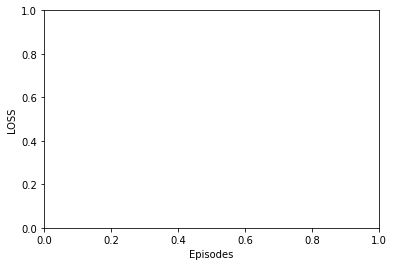

In [28]:
from IPython.display import clear_output
%matplotlib inline
fig = plt.figure(figsize=(20,5))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Episodes')
ax.set_ylabel('LOSS')

'''
TRAIN DQN ON THE FIRST GAME
'''
rew_list = []
e=0
for e in range(1, HYPERPARAMS["NUM_EPISODES"]+1):
    print("Agent is ready for gameplay...")
    image_stack, times_rewarded, times_penalized, rgb_stack = gameplay(PLAY_TYPE=TRAIN, MAX_EPISODE_PLAYTIME=1000)
            
    rew_list.append(times_rewarded)
            
    if(e % HYPERPARAMS["AUTOSAVE_CHECKPOINT"] == 0):
        clear_output(wait=True)
        print("Finished episode ", e , "/", HYPERPARAMS["NUM_EPISODES"], " Total reward = ", sum(rew_list)/len(rew_list), " eps = ", agent.epsilon)
        if HYPERPARAMS["ON_COLAB"]:
            if not os.path.exists(HYPERPARAMS["VIS_DIR"]):
                os.mkdir(HYPERPARAMS["VIS_DIR"])
            generate_gif(len(rgb_stack), rgb_stack, sum(rew_list)/(len(rew_list)), HYPERPARAMS["VIS_DIR"] + "/", e)
        
        rew_list = []
        print(f"Saving Model Checkpoint at episode {e}...")
        agent.save_model("models/tmp_model_breakout_" + str(e) + ".h5")        
        ax.set_xlim(0,e)
        ax.set_ylim(0,max(LOSS_HISTORY))
        plt.plot(np.arange(len(LOSS_HISTORY)),LOSS_HISTORY)
        plt.show()

    # BACKPROP INITIATED AT THE END OF EVERY EPISODE AND NOT AT TGT_FREQ
    agent.replay(HYPERPARAMS["MINIBATCH_SIZE"], model_swap)
    model_swap = model_swap + 1
    
print(f"Agent is now prepared now, after training for {e} episodes.")

#### Saving the final model

In [ ]:
agent.save_model("models/" + HYPERPARAMS["SAVED_MODEL_NAME"])

## Testing the model
If you open checkpoint "model_dqn_breakout_1.h5" we can see that model is able to move towards the ball direction, but still has to keep up to get the score. This is some progress from random movement from random sample of env.action_space.n. We have achieved this model about 18hrs of training on GOOGLE COLAB in the background.

In [ ]:
env = gym.make(HYPERPARAMS["ENV_NAME"])
agent = Agent(env, model_pathname="models/model_dqn_breakout_1.h5" ) # model_pathname=("models/" + HYPERPARAMS["SAVED_MODEL_NAME"])

Setting up the agent ...
Agent has been Sucessfully setup ...


In [ ]:
agent.model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 84, 84, 4)]       0         
                                                                 
 conv2D_1 (Conv2D)           (None, 20, 20, 32)        8192      
                                                                 
 conv2D_2 (Conv2D)           (None, 9, 9, 64)          32768     
                                                                 
 conv2D_3 (Conv2D)           (None, 7, 7, 64)          36864     
                                                                 
 conv2D_4 (Conv2D)           (None, 1, 1, 1024)        3211264   
                                                                 
 flat_1 (Flatten)            (None, 1024)              0         
                                                                 
 q_values (Dense)            (None, 4)                 410

In [ ]:
rew_list = []
total_times_rewarded=total_times_penalized=0
for e in range(HYPERPARAMS["NUM_EVAL"]):
    image_stack, times_rewarded, times_penalized, rgb_stack = gameplay(PLAY_TYPE=TEST, MAX_EPISODE_PLAYTIME=1000)
    
    total_times_rewarded  = total_times_rewarded + times_rewarded
    total_times_penalized = total_times_penalized+ times_penalized
    rew_list.append(times_rewarded)
    
    print("Finished episode ", e , "/", HYPERPARAMS["NUM_EVAL"], " Total reward = ", times_rewarded*(10))
    if HYPERPARAMS["ON_COLAB"]:
        if not os.path.exists("test"):
            os.mkdir("test")
        generate_gif(len(rgb_stack), rgb_stack, total_times_rewarded, "test/", e)

print("Testing Complete")

Finished episode  0 / 20  Total reward =  10


KeyboardInterrupt: 

## Transfer Learning: PART II

In [ ]:
prev_env = gym.make('BreakoutDeterministic-v4')
env = gym.make('SpaceInvaders-v0')

agent = Agent(prev_env) # Using Previous model

Setting up the agent ...
Agent has been Sucessfully setup ...


In [ ]:
# Transfer Learning condition: Requires (prev_env.action_space.n <= env.action_space.n)
# We are assuming the next game to be played is higher complex than old game we have trained.
agent.transfer_learning(
    env,
    'models/model_dqn_breakout_1.h5', # HYPERPARAMS["TRANSFER_MODEL_NAME"],
    agent.action_size, # Number of Old actions=4
    (env.action_space.n-agent.action_size) # Number of New actions, Excluding old one's = 2
) 

### Training (On new Game using model of old game)

Agent is ready for gameplay...


C:\Users\rahul\miniconda3\envs\cs677\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


Game Play Paused! Model is training on it's past Memory
Target model swapped successfully with Trained model!
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Target model swapped successfully with Trained model!
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory
Target model swapped successfully with Trained model!
Agent is ready for gameplay...
Game Play Paused! Model is training on it's past Memory


KeyboardInterrupt: 

<Figure size 1440x360 with 0 Axes>

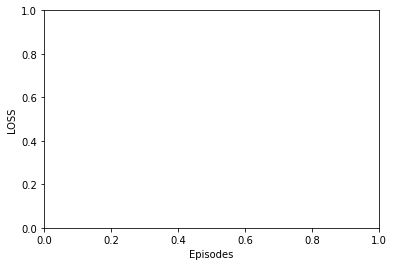

In [ ]:
from IPython.display import clear_output
%matplotlib inline
fig = plt.figure(figsize=(20,5))
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Episodes')
ax.set_ylabel('LOSS')


from datetime import datetime
start_time = datetime.now()
'''
TRAIN DQN ON THE SECOND GAME
'''
rew_list = []
e=0
for e in range(1, HYPERPARAMS["NUM_EPISODES"]+1):
    print("Agent is ready for gameplay...")
    image_stack, times_rewarded, times_penalized, rgb_stack = gameplay(PLAY_TYPE=TRAIN, MAX_EPISODE_PLAYTIME=1000)
            
    rew_list.append(times_rewarded)
            
    if(e % HYPERPARAMS["AUTOSAVE_CHECKPOINT"] == 0):
        print("Finished episode ", e , "/", HYPERPARAMS["NUM_EPISODES"], " Total reward = ", sum(rew_list)/len(rew_list), " eps = ", agent.epsilon)
        if HYPERPARAMS["ON_COLAB"]:
            if not os.path.exists(HYPERPARAMS["VIS_DIR"]):
                os.mkdir(HYPERPARAMS["VIS_DIR"])
            generate_gif(len(rgb_stack), rgb_stack, sum(rew_list)/(len(rew_list)), HYPERPARAMS["VIS_DIR"] + "/", e)
        
        rew_list = []
        print(f"Saving Model Checkpoint at episode {e}...")
        agent.save_model("models/tmp_model_spaceinvader_" + str(e) + ".h5")
        ax.set_xlim(0,e)
        ax.set_ylim(0,max(LOSS_HISTORY))
        plt.plot(LOSS_HISTORY)
        plt.show()

    # BACKPROP INITIATED AT THE END OF EVERY EPISODE AND NOT AT TGT_FREQ
    agent.replay(HYPERPARAMS["MINIBATCH_SIZE"], model_swap)
    model_swap = model_swap + 1
    
print(f"Agent is now prepared now, after training for {e} episodes.")

print("Transfer Learning's Training Completes")
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
agent.save_model('./models/model_dqn_spaceinvader.h5')

If you have conducted any training the Loss History can be showcased w.r.t episodes trained using below code.

### Testing

Initially if you run this with the original 'dqn_model.h5' you can see that the agent forgot how to FIRE in SpaceInvader. Because, the fire action is only used once throught Breakout, at Start. Also we can see that the agent is moving close to the bullet at time, as it is assuming bullets of SpaceInvader is the ball it was trained to save from dropping in Breakout. Now all we have to do is Train the model of SpaceInvader from here by using above code block for training.

In [ ]:
from datetime import datetime
start_time = datetime.now()

rew_list = []
total_times_rewarded=total_times_penalized=0
for e in range(HYPERPARAMS["NUM_EVAL"]):
    image_stack, times_rewarded, times_penalized, rgb_stack = gameplay(PLAY_TYPE=TEST, MAX_EPISODE_PLAYTIME=1000)
    
    total_times_rewarded  = total_times_rewarded + times_rewarded
    total_times_penalized = total_times_penalized+ times_penalized
    rew_list.append(times_rewarded)
    
    print("Finished episode ", e , "/", HYPERPARAMS["NUM_EVAL"], " Total reward = ", times_rewarded*(10))
    if HYPERPARAMS["ON_COLAB"]:
        if not os.path.exists("test"):
            os.mkdir("test")
        generate_gif(len(rgb_stack), rgb_stack, total_times_rewarded, "test/", e)

print("Transfer Learning's Testing Completes")
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Finished episode  0 / 20  Total reward =  0
Finished episode  1 / 20  Total reward =  0
Finished episode  2 / 20  Total reward =  0
Finished episode  3 / 20  Total reward =  0
Finished episode  4 / 20  Total reward =  0
Finished episode  5 / 20  Total reward =  0
Finished episode  6 / 20  Total reward =  0
Finished episode  7 / 20  Total reward =  0
Finished episode  8 / 20  Total reward =  0
Finished episode  9 / 20  Total reward =  0
Finished episode  10 / 20  Total reward =  0
Finished episode  11 / 20  Total reward =  0
Finished episode  12 / 20  Total reward =  0
Finished episode  13 / 20  Total reward =  0
Finished episode  14 / 20  Total reward =  0
Finished episode  15 / 20  Total reward =  0
Finished episode  16 / 20  Total reward =  0
Finished episode  17 / 20  Total reward =  10
Finished episode  18 / 20  Total reward =  0
Finished episode  19 / 20  Total reward =  0
Transfer Learning's Testing Completes
Duration: 0:09:25.716924


In [ ]:
env.close()
exit(1) # Close Gym Windows